# Tech Store Annual Performance Review: Analyzing Sales, Products, and Locations.

## Introduction:
Welcome to the "Tech Store Annual Performance Review" project, a comprehensive analysis aimed at unraveling the details of the tech store's year-long performance. In this exploration, we delve into the realms of sales dynamics, product performance, and geographical distribution to extract valuable insights.

## Project Objectives:

1. **Calculate Revenue and Total Units Sold:**
  - Establish a foundational understanding by computing the total revenue generated and the overall quantity of units sold. These metrics serve as fundamental indicators for the store's financial performance.

2. **Evaluate Overall Sales Trends over the Year:**
  - Conduct a thorough examination of sales trends throughout the year, uncovering patterns, fluctuations, and noteworthy peaks. This analysis aims to provide a holistic understanding of the store's sales trajectory.

3. **Identify Products with Highest and Lowest Sales:**
  - Pinpoint high-performing and underperforming products by assessing their respective sales figures. This evaluation aids in recognizing market trends, optimizing product offerings, and refining marketing strategies.

4. **Identify Peak Order Times:**
  - Explore the temporal dimension of our sales data to identify peak order times. Understanding the timing of high order volumes is crucial for resource allocation, staffing optimization, and targeted marketing efforts.

5. **Examine Sales Distribution Across Different Cities:**
  - Analyze the geographical spread of our sales across various cities. This examination provides insights into regional preferences, market dynamics, and opportunities for targeted growth.

## Analyst Information:

**Project Analyst:** Zeinab Elrashied Hassan Mohammed

**LinkedIn Profile:** www.linkedin.com/in/zeinabelrashied

**Email:** [zeinabalrashiedhassan@gmail.com]

Feel free to connect for further discussions or collaborations.


_____________________________________________________________________________

**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**LOAD THE DATAST**

In [2]:
data = pd.read_csv("tech store dataset.csv")

### DATA CLEANING:

In [3]:
# Disply the first 5 rows
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# The shape of the dataset
data.shape

(186850, 6)

In [5]:
# Checking null values
data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
# Drop null values
data.dropna(inplace=True)

In [7]:
# Checking duplicate values
data.duplicated().sum()

618

In [8]:
# Drop duplicate values
data.drop_duplicates(inplace = True)

In [9]:
# A concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [10]:
# Fix Quantity Ordered column data type
data["Quantity Ordered"].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [11]:
# Get rid of the text in "Quantity Ordered" column
data[data["Quantity Ordered"] == "Quantity Ordered"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
data.drop(519, axis=0, inplace=True)

In [13]:
# checking 
data["Quantity Ordered"].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [14]:
# Fix Quantity Ordered data type
data["Quantity Ordered"] = data["Quantity Ordered"].apply(pd.to_numeric)

In [15]:
# Fix Price Each data type
data["Price Each"] = data["Price Each"].apply(pd.to_numeric)

In [16]:
# Convert "Order Date" to datetime format
data["Order Date"] = data["Order Date"].apply(pd.to_datetime)

In [17]:
data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [18]:
data.describe()

,Quantity Ordered,Price Each
count,185686.000000,185686.000000
mean,1.124544,184.519255
std,0.443069,332.843838
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


-----------------------------

<h4>1. Calculate Revenue and Total Units Sold

In [19]:
# Create a new column for sales
data["sales"] = data["Quantity Ordered"] * data["Price Each"]

In [20]:
# Caluclate total sales
total_sales = data["sales"].sum()

# Caluclate total quantity ordered
total_quantity_ordered = data["Quantity Ordered"].sum()

print("Revenue =", total_sales)
print("Total Units Sold =", total_quantity_ordered, "units")

Revenue = 34465537.94
Total Units Sold = 208812 units


<h4>2. Evaluate overall sales trends over the year

In [21]:
# Creating month column from Order Date column
data["month"] = data["Order Date"].apply(lambda x: x.strftime("%m"))

# Convert 'month' to categorical for correct ordering
data['month'] = pd.Categorical(data['month'], categories=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], ordered=True)

In [22]:
# Group by month and sales
sales_over_month = pd.DataFrame(data.groupby("month").sum()["sales"]).reset_index()

# Set the display format for float numbers
pd.options.display.float_format = "{:,.2f}".format

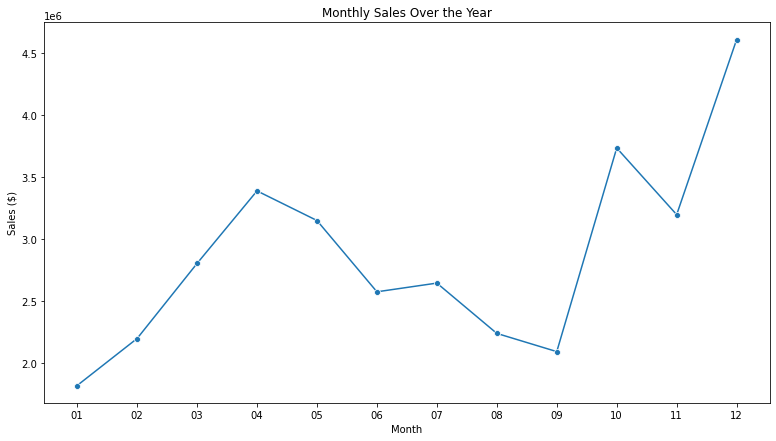

In [23]:
# Plotting
plt.figure(figsize=(13, 7))
sns.lineplot(x='month', y='sales', data=sales_over_month, marker='o')
plt.title('Monthly Sales Over the Year')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.show()

>**Conclusion:**
>- Throughout the year, the sales data exhibited distinctive patterns, featuring notable surges in February and April, with sales reaching \\$2,200,078.08 and \\$3,389,217.98, respectively. Despite variations in other months, these trends culminated in a significant peak of \\$4,608,295.70 in December.

<h4>3. Identify products with the highest and lowest sales.

In [24]:
# Group the data by "Product" and calculate the sum of sales
high_low_prod_sales = pd.DataFrame(data.groupby("Product").sum()["sales"]).sort_values("sales", ascending=False).reset_index()

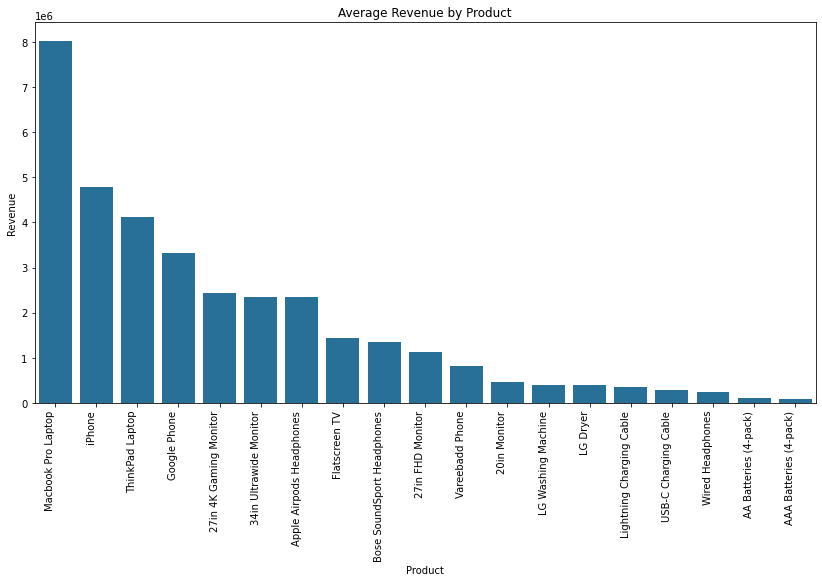

In [69]:
# Plotting
plt.figure(figsize=(14,7))

sns.barplot(x="Product", y="sales", data=high_low_prod_sales, color="#1775AB")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Average Revenue by Product")
plt.xticks(rotation="vertical", ha="right")

plt.show()

>**Conclusion:**
>- Upon a thorough analysis of product sales, several key insights have emerged, shedding light on both high-performing and underperforming products. The Macbook Pro Laptop stands out as the top performer, generating an impressive \\$8,032,500.00 in sales, followed closely by the iPhone at \\$4,792,900.00 and the ThinkPad Laptop at \\$4,127,958.72. These products have demonstrated significant market demand and contribute substantially to our overall revenue.
>
>- On the other end of the spectrum, the AAA Batteries (4-pack) and AA Batteries (4-pack) exhibit comparatively lower sales, with \\$92,648.14 and \\$106,041.60, respectively. While these products may represent niche or complementary offerings, their sales figures suggest potential areas for optimization or targeted marketing strategies.

<h4>4. Identify peak order times

In [26]:
# Extract hour from 'Order Date'
data["hour"] = data["Order Date"].dt.hour

# Identify peak order times
peak_order_times = pd.DataFrame(data.groupby("hour")["Order Date"].count())

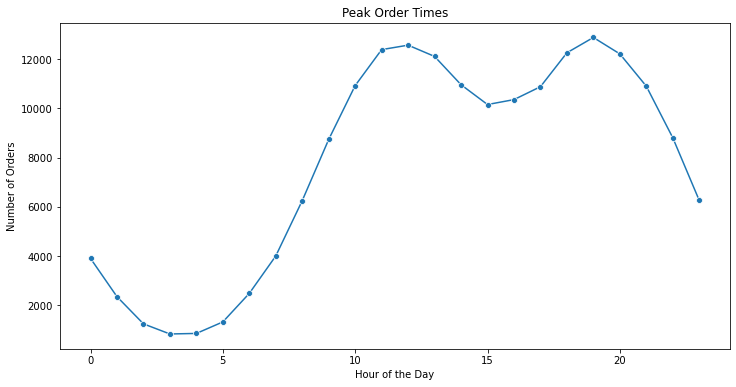

In [27]:
# Identify peak order times
peak_order_times = pd.DataFrame(data.groupby("hour").count()["Order Date"].reset_index(name="Count"))

# Visualize peak order times
plt.figure(figsize=(12, 6))
sns.lineplot(x="hour", y="Count", data=peak_order_times, marker='o')
plt.title("Peak Order Times")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.show()

>**Conclusion:**
>- The analysis of peak order times indicates distinct patterns in customer purchasing behavior. The data reveals a significant surge in orders during daytime, particularly from 9 AM to 3 PM, peaking at 12:00 PM with 12,573 orders. A secondary surge occurs in the evening, with the highest order count at 8:00 PM (12,263 orders). Understanding these peak times is crucial for resource allocation, staffing optimization, and targeted marketing efforts, providing insights to enhance operational efficiency and engage customers effectively.

<h4>5. Examine sales distribution across different cities.

In [28]:
# Getting city and state from Purshaced Address
def get_city(address):
    return address.split(",")[1].strip()

def get_state(address):
    return address.split(",")[2].split(" ")[1]

data['city'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

In [29]:
# Group the data by "city" and calculate the sum of sales
city_sales = pd.DataFrame(data.groupby("city").sum()["sales"]).reset_index()

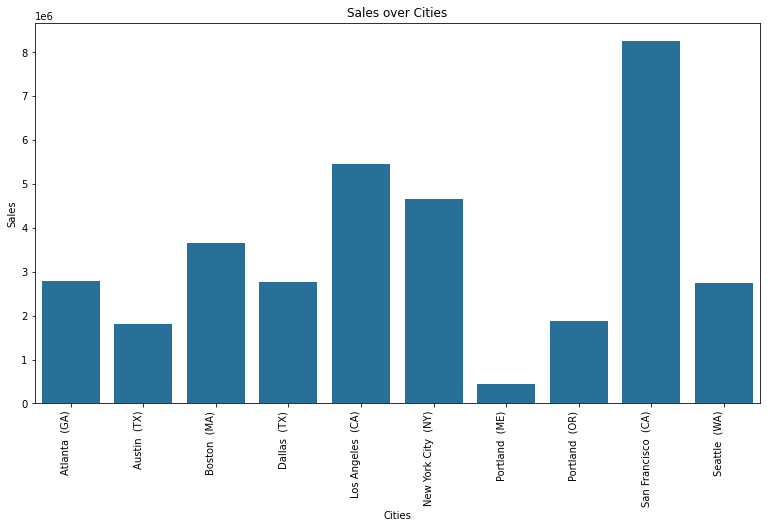

In [71]:
#Plotting
plt.figure(figsize=(13,7))

sns.barplot(x = "city", y = "sales", data = city_sales, color="#1775AB")
plt.xlabel("Cities")
plt.ylabel("Sales")
plt.title("Sales over Cities")
plt.xticks(rotation="vertical", ha="right")
plt.show()

>**Conclusion:**
>- The analysis of sales distribution across cities highlights distinct market dynamics. San Francisco (CA) leads with the highest sales at \\$8,254,743.55, followed closely by Los Angeles (CA) and New York City (NY). While major metropolitan areas showcase substantial sales, smaller markets such as Portland (ME) and Portland (OR) present opportunities for targeted growth. Understanding these geographical trends guides strategic marketing efforts and resource allocation, optimizing our reach and impact across diverse regions.